In [7]:
import cv2
import glob
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

selected 10 images


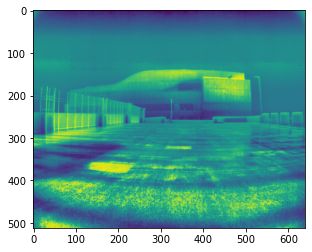

In [12]:
files_path = '/media/colin/box_data/ir_data/nuance_data/columbus_garrage_day_night/garrage_roof_nuance_jul17_5pm_1/cam_3/matlab_clahe2'
descriptors_path = '/media/colin/box_data/ir_data/nuance_data/columbus_garrage_day_night/garrage_roof_nuance_jul17_5pm_1/cam_3/matlab_clahe2/irpoint_v5/descriptors'
bow_executable = '/home/colin/Research/ir/DBoW2/build/simple_ir_test'
temp_dir = '/home/colin/Research/ir/DBoW2/tmp'
vocab_file = '/media/colin/box_data/ir_data/dbow2_vocabularies/irpoint_k4_L10.yml.gz'

image_files = sorted(glob.glob(os.path.join(files_path,"*.png")))
descriptor_files = sorted(glob.glob(os.path.join(descriptors_path,"*.npy")))
n_images = 10
n_skip = int(len(image_files)/n_images)+1

offset_image_files = [f for i, f in enumerate(image_files) if (i+10)%n_skip==0]
image_files = [f for i, f in enumerate(image_files) if i%n_skip==0]
print("selected {} images".format(len(image_files)))
image_basenames = [os.path.basename(p)[:-4] for p in image_files]
offset_image_basenames = [os.path.basename(p)[:-4] for p in offset_image_files]
descriptor_files = [os.path.join(descriptors_path, b+".npy") for b in image_basenames]
offset_descriptor_files = [os.path.join(descriptors_path, b+".npy") for b in offset_image_basenames]
# _ = [print( os.path.isfile(p)) for p in descriptor_files]

#write descriptor file names to temp file
desc_txt_path = os.path.join(temp_dir,"dirs.txt")
with open(desc_txt_path,'w') as file:
    for d_path in descriptor_files[:-1]:
        file.write(d_path + '\n')
    file.write(descriptor_files[-1])


#read images and descriptors
images = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in image_files]
descriptors = [np.load(d) for d in descriptor_files]

#show images
_ = plt.imshow(images[0])

In [ ]:
import subprocess
cmd = bow_executable
process = subprocess.Popen()
process.wait()